# Маркетинговая и продуктовая аналитика для сервиса Яндекс.Афиша

## Импорт библиотек

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Изучение данных и подготовка к анализу

### Посещения сайта

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv' )
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.isnull().sum() #ищем пропуски

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

>1. В датасете нет пропусков  
>2. Приведем названия колонок к нижнему регистру и поставим нижние подчеркивания вместо пробелов в названиях
>3. Тип данных в колонках End TS и Start TS требуется привести к формату datetime  
>4. Проверим данные на дубликаты  
>5. Поищем странные и выбивающиеся значения

In [5]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_') #приведем названия колонок к нижнему регистру и заменим пробелы на нижние подчеркивнаия
#visits.head(10)


In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts']) #приведем данные в столбце end_ts к временному типу
visits['start_ts'] = pd.to_datetime(visits['start_ts']) #приведем данные в столбце start_ts к временному типу
#visits.info()

In [7]:
print('Количество дубликатов в датасете visits:', visits.duplicated().sum()) #проверяем данные на дубликаты

Количество дубликатов в датасете visits: 0


In [8]:
visits.describe() #проверим нет ли отрицательных значений, которые можно было бы посчитать некорректными

,source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [9]:
visits['device'].unique() #посмотрим на возможные странные значения в колонке device

array(['touch', 'desktop'], dtype=object)

Странных и выбивающихся значений нет

### Информация о заказах

In [10]:
orders = pd.read_csv('/datasets/orders_log.csv' )
orders.head()


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [12]:
orders.isnull().sum() #ищем пропуски

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

>1. В датасете нет пропусков  
>2. Приведем названия колонок к нижнему регистру и поставим нижние подчеркивания вместо пробелов в названиях
>3. Тип данных в колонке Buy TS требуется привести к формату datetime  
>4. Проверим данные на дубликаты  
>5. Поищем странные и выбивающиеся значения

In [13]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_') #приведем названия колонок к нижнему регистру и заменим пробелы на нижние подчеркивнаия
#orders.head(10)

In [14]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts']) #приведем данные в столбце buy_ts к временному типу
#orders.info()

In [15]:
print('Количество дубликатов в датасете orders:', orders.duplicated().sum()) #проверяем данные на дубликаты

Количество дубликатов в датасете orders: 0


In [16]:
orders.describe() #проверим нет ли странных значений, которые можно было бы посчитать некорректными

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Смущает наличие нулевой суммы заказа. Может быть покупатель применил какие-нибудь специальные условия, промокод, расплатился баллами и тп? Посмотрим сколько таких значений встречается

In [17]:
orders[orders['revenue'] == 0].count()

buy_ts     51
revenue    51
uid        51
dtype: int64

51 значение  - это всего 0.1% от общей массы. Думаю, на выводы эти данные не повлияют. Возможно, это, действительно, была оплата бонусами / сертификатом и тп. Оставим их.

### Информация о расходах

In [18]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head(10)


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [20]:
costs.isnull().sum() #ищем пропуски

source_id    0
dt           0
costs        0
dtype: int64

>1. В датасете нет пропусков  
>2. Тип данных в колонке dt требуется привести к формату datetime  
>3. Проверим данные на дубликаты  
>4. Поищем странные и выбивающиеся значения

In [21]:
costs['dt'] = pd.to_datetime(costs['dt'])  #приведем данные в столбце dt к временному типу
#costs.info()

In [22]:
print('Количество дубликатов в датасете costs:', costs.duplicated().sum())  #проверяем данные на дубликаты

Количество дубликатов в датасете costs: 0


In [23]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


## Расчет метрик и построение графиков

### Продуктовые метрики

#### Расчет DAU, WAU и MAU. Вычисление средних значений этих метрик за весь период. Построение графиков с  изменениями метрик во времени 

In [24]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [25]:
dau_visits = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index() #количество уникальных пользователей в день
dau_visits.head()


,session_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [26]:
dau_visits_mean = dau_visits.mean() #рассчитываем среднее количество ункиальных пользователей в день за весь период
print(int(dau_visits_mean))

907


In [27]:
dau_visits.describe()

,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


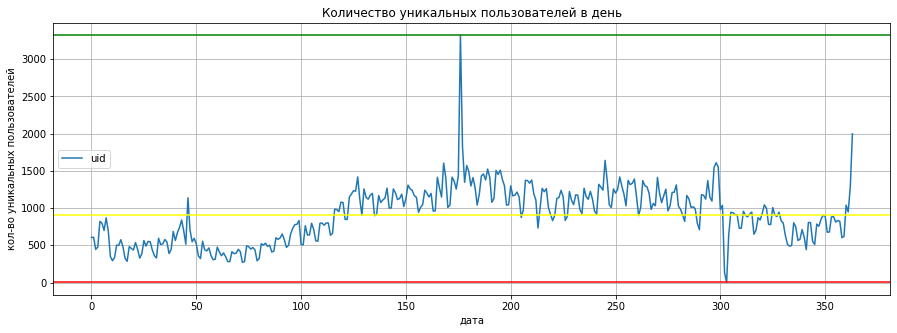

In [28]:
#строим график количества уникальных пользователей в день

dau_visits.plot(figsize = (15,5), grid=True)
plt.title('Количество уникальных пользователей в день')
plt.xlabel('дата')
plt.ylabel('кол-во уникальных пользователей')
plt.axhline(y = 3319, color = 'green')
plt.axhline(y = 1, color = 'red')
plt.axhline(y = 907, color = 'yellow')
plt.show()

In [29]:
wau_visits = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
#wau_visits.head()


In [30]:
wau_visits_mean = wau_visits.mean() #рассчитываем среднее количество ункиальных пользователей в неделю за весь период
print(int(wau_visits_mean))

5716


In [31]:
wau_visits.describe()

,uid
count,53.000000
mean,5716.245283
std,2049.898027
min,2021.000000
25%,4128.000000
50%,5740.000000
75%,7401.000000
max,10586.000000


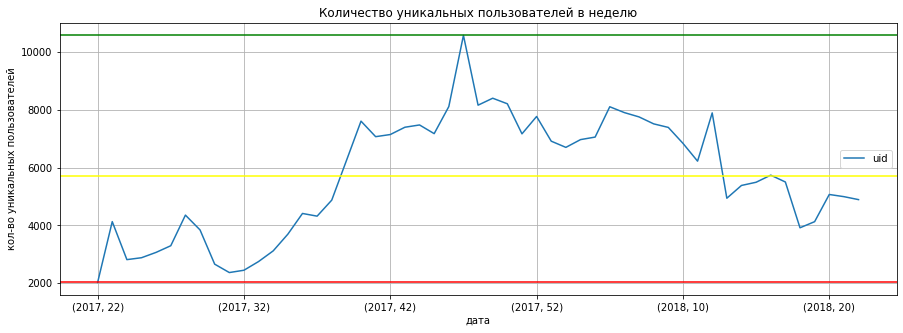

In [32]:
#строим график количества уникальных пользователей в неделю

wau_visits.plot(figsize = (15,5), grid=True)
plt.title('Количество уникальных пользователей в неделю')
plt.xlabel('дата')
plt.ylabel('кол-во уникальных пользователей')
plt.axhline(y = 10586, color = 'green')
plt.axhline(y = 2021, color = 'red')
plt.axhline(y = 5716, color = 'yellow')
plt.show()

In [33]:
mau_visits = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}) #количество уникальных пользователей в месяц
#mau_visits.head()


In [34]:
mau_visits_mean = mau_visits.mean() #рассчитываем среднее количество уникальных пользователей в месяц за весь период
print(int(mau_visits_mean))

23228


In [35]:
mau_visits.describe()

,uid
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


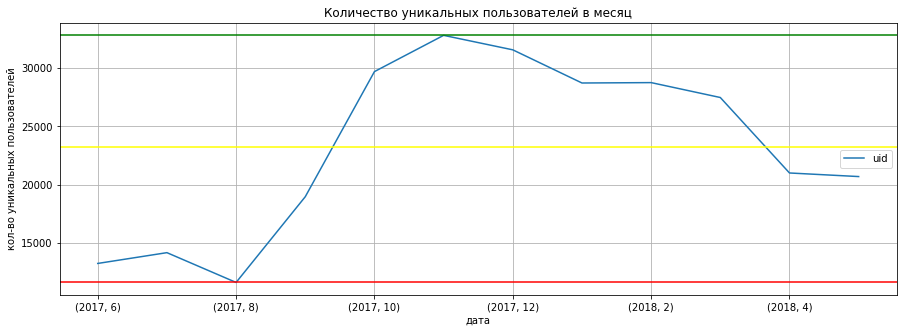

In [36]:
#строим график количества уникальных пользователей в месяц

mau_visits.plot(figsize = (15,5), grid=True)
plt.title('Количество уникальных пользователей в месяц')
plt.xlabel('дата')
plt.ylabel('кол-во уникальных пользователей')
plt.axhline(y = 32797, color = 'green')
plt.axhline(y = 11631, color = 'red')
plt.axhline(y = 23228, color = 'yellow')
plt.show()

>**Выводы:**  
> 1. Среднее количество уникальных пользователей Яндекс.Афиши в день: 907 человек. Резкий пик был всего однажды, в конце ноября 2017 года(3319 пользователей зашли на сайт), а резкий спад в самом конце марта 2018 года (всего 1 уникальный пользователь). В остальном дневное количество посетителей можно считать достаточно ровным. После резкого спада в 2018 году, количество посетителей так и не достигло средней посещаемости в период до этого спада. Рост до прошлых показателей начался только в самом конце мая 2018. С середины августа 2017 до октября 2017 дневное количество посетителей растет, а начиная с октября 2017 до резкого спада в конце марта 2018 года, идет достаточно ровными показателями.     
> 2. Среднее количество уникальных пользователей Яндекс. Афиши в неделю: 5716 человек. Пик в 10586 человек был примерно на 47 неделе 2017 года (как раз, конец ноября 2017 года) Этот пик скорее всего появился из-за резкого скачка посетителей в один день. А недельный провал в уникальных посетителях пришлеся на начало периода, 22 неделю 2017 года, а также примерно на 30 неделю 2017 года. Более таких сильных недельных спадов не наблюдалось.    
> 3. Среднее количество уникальных пользователей Яндекс. Афиши в месяц: 23228 человек. Пик в ноябре 2017, а сильный спад в августе 2017. Спад также начался в марте 2018 года, в апреле показатели выровнялись но не выросли. С августа 2017 по ноябрь 2017 наблюдался стабильный рост,но вреоятнее всего после аномального скачка, показатели чуть упали до прошлых отметок и продолжили падать вплоть до конца периода.    
> 4. Вероятнее всего, такие спады и падения связаны с сезонностью


#### Сколько раз за день пользователи в среднем заходят на сайт.

In [37]:
session_per_day_mean = visits.groupby('session_date').agg({'uid': 'count'}).mean() #среднее количество сессий в день
print(int(session_per_day_mean))

987


In [38]:
print('Пользователи в среднем заходят на сайт: {:.2f}'.format(float(session_per_day_mean / dau_visits_mean)), 'раз в день')

Пользователи в среднем заходят на сайт: 1.09 раз в день


In [39]:
session_per_day = visits.groupby('session_date').agg({'uid': 'count'}).reset_index() #количество сессий в день
#session_per_day.head()

In [40]:
dau_visits = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index() #количество уникальных пользователей в день
#dau_visits.head()

In [41]:
session_per_user = session_per_day.merge(dau_visits, on='session_date')
session_per_user.columns=['session_date', 'sessions', 'unique_users']
#session_per_user.head()

In [42]:
session_per_user['sessions_per_day'] = session_per_user['unique_users'] / session_per_user['sessions']
#session_per_user.head()

In [43]:
session_per_user = session_per_user.drop(['sessions', 'unique_users'], axis=1)
session_per_user.head()

,session_date,sessions_per_day
0,2017-06-01,0.911145
1,2017-06-02,0.924012
2,2017-06-03,0.932914
3,2017-06-04,0.933333
4,2017-06-05,0.918253


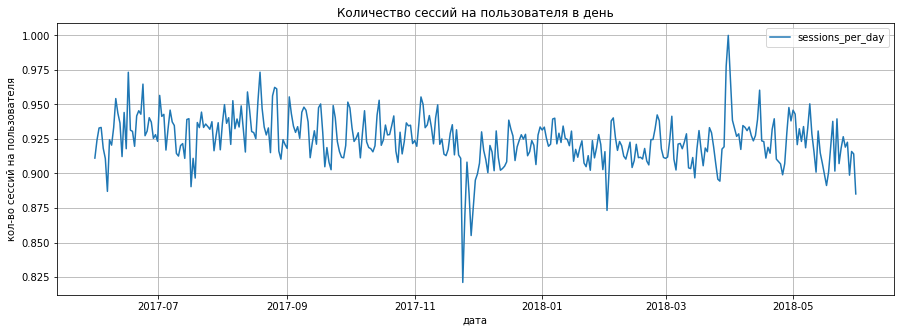

In [44]:
session_per_user.plot(x='session_date', y='sessions_per_day', kind='line', figsize = (15,5), grid=True)
plt.title('Количество сессий на пользователя в день')
plt.xlabel('дата')
plt.ylabel('кол-во сессий на пользователя')
plt.show()

>**Выводы:**  
>1. В среднем пользователи заходили на сайт Яндекс.Афиши в выбранный период 1 раз в день.  
>2. Интересно, что в конце ноября 2017 наблюдается провал в этом показателе, а в апреле 2018 самая подъем. Скорее всего эти спады и провалы совпадают с "аномальными" значениями по посещениям в день.


#### Исследование количества времени, которое пользователи проводят на сайте. Определение продолжительности типичной пользовательской сессии за весь период.

In [45]:
visits['session_time_min'] = (visits['end_ts'] - visits['start_ts']).dt.seconds / 60 
#visits.head()

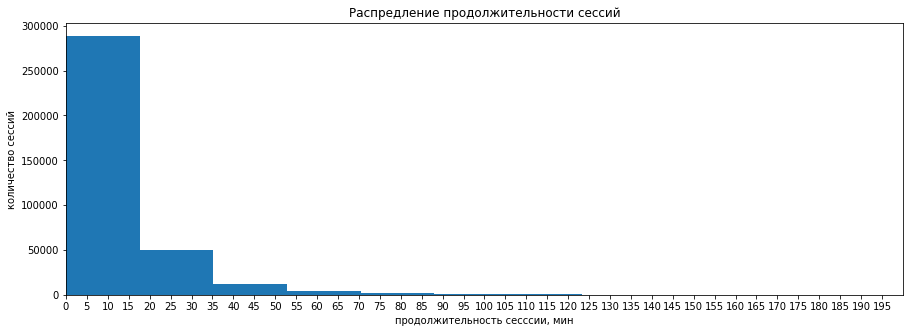

In [46]:
visits['session_time_min'].plot(kind = 'hist', bins=80, figsize=(15,5))
plt.title('Распредление продолжительности сессий')
plt.xlabel('продолжительность сесссии, мин')
plt.ylabel('количество сессий')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 5))
plt.show()


Большинство пользователей проводят на сайте до 17 минут

In [47]:
visits_query = visits.query('session_time_min <= 70') #так как слишком маленькое количество пользователей проводят на сайте больше 70 минут, для расчета среднего возьмем срез
print('Среднее значение составляет:', visits_query['session_time_min'].mean())
print('Медиана составляет:', visits_query['session_time_min'].median())
print('Мода составляет:', visits_query['session_time_min'].mode()) #т.к. распределение ненормальное, считаем моду

Среднее значение составляет: 9.585418215124966
Медиана составляет: 5.0
Мода составляет: 0    1.0
dtype: float64


>**Выводы:**    
>
>Типичная пользовательская сессия составляет 1 минуту  
>
>По всей вероятности человек моментально покупает билеты. Т.е. переходя на сайт, он уже знает за чем идет и, возможно, уже положил билеты в корзину. Также, вероятнее всего, покупка совершена через приложение, когда платежные реквизиты уже заведены или через apple / google pay. Если это так, то у большинства пользователей должна быть хотя бы одна сессия, которая длится нормальное количество времени, если он подбирает мероприятия через Яндекс Афишу или хотя бы размышляет над местами, а не только покупает билеты, которые уже в корзине. За 1 минуту совершить покупку даже если целеноправленно выбираешь определенное мероприятие, просто нереально в большинстве случаев.

#### Расчет Retention Rate, применяя когортный анализ. Отражение изменения метрики во времени на графике. Расчет среднего Retention Rate на второй месяц «жизни» когорт.

In [48]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min() #узнаем дату первого посещения сайта каждым пользователем
first_activity_date.name = 'first_activity_date'
user_activity = visits.join(first_activity_date, on='uid')
#user_activity.head()

In [49]:
#за период когорты возьмем один месяц, выделим месяц первого посещения пользователем и последующие месяцы посещений
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')
user_activity['activity_month'] = user_activity['start_ts'].astype('datetime64[M]')
#user_activity.head()

In [50]:
user_activity['cohort_lifetime'] = (user_activity['activity_month'] - user_activity['first_activity_month'])

user_activity['cohort_lifetime'] = user_activity[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')

user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int') 

#user_activity.head()

In [51]:
cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() #сгруппируем данные по когорте и lifetime
#cohorts.head()

In [52]:
#найдем первоначальное чиcло пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]
#display(initial_users_count)

In [53]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) #переименуем колонку uid 
initial_users_count.head()

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [54]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month') #склеим датасеты в один
#cohorts.head()

In [55]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] # посчитаем retention rate
#cohorts.head(10)

In [56]:
#построим сводную таблицу
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


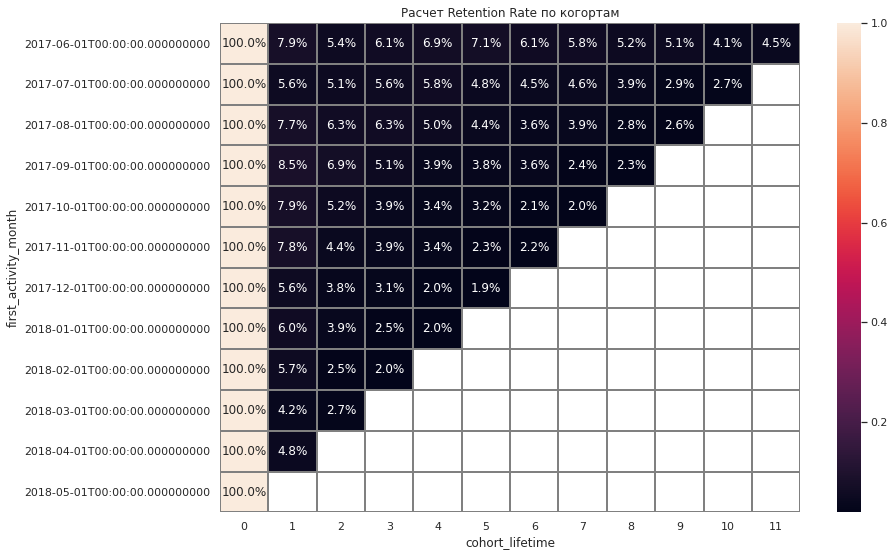

In [57]:
#создадим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Расчет Retention Rate по когортам')
plt.xlabel('месяц жизни когорты')
plt.ylabel('когорта')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

In [58]:
mean_retention_for_1_cohort = (cohorts[cohorts['cohort_lifetime'] == 1]['retention']).mean()
print('Средний Retention Rate на второй месяц жизни когорт составляет: {:.2%}'.format(mean_retention_for_1_cohort))

Средний Retention Rate на второй месяц жизни когорт составляет: 6.52%


>**Выводы:**  
>1. С каждым месяцем в среднем Retention Rate в каждой когорте падает.  
>2. Самый высокий Retention rate за 1 месяц у пользователей, пришедших на сайт в сентябре, а вот самый низкий у мартовских пользователей. Связано ли это с сезонностью и возрастанием спроса на развлечения к осени? Осенью RR стабильно показывает довольно высокие показатели по отношению к остальным. Также высокий показатель в июне, а вот в июле наблюдается резкий спад. Возможно, в этот месяц много отпусков и пользователи, зашедшие на сайт в июле, были менее заинтересованы в предложении.  
>3. Для пользователей, пришедших в июне RR составляет 7,8 процентов в первый месяц, а у тех, кто пришел уже в апреле всего 4,2%. RR за >9 месяцев упал на 3,6%. Однако в апреле ему удалось вырасти на 0.6 пунктов. Если сервис не ухудшался, возможно, скачки связаны с сезонностью, поэтому стоит обратить внимание на месяцы, где RR проседает и сделать упор на кампании мероприятий, которые больше всего заинтересуют пользователей в это время

### Метрики электронной коммерции

#### Исследование среднего времени с момента первого посещения сайта до совершения покупки

In [59]:
user_activity_orders = user_activity.merge(orders, on='uid', how='right') #склеиваем таблицы (визиты в котором уже есть столбец с первым посещением сайта и дата совершения покупки)
#user_activity_orders.head()

In [60]:
#узнаем дату и время соврешения первой покупки каждым пользователем
first_buy_date = user_activity_orders.groupby(['uid'])['buy_ts'].min() 
first_buy_date.name = 'first_buy_date'
user_activity_orders = user_activity_orders.join(first_buy_date, on='uid')
#user_activity_orders.head()


In [61]:
user_activity_orders['time_to_buy'] = (user_activity_orders['first_buy_date'] - user_activity_orders['first_activity_date']).dt.seconds / 60
#user_activity_orders.head()

In [62]:
user_activity_orders_grouped = user_activity_orders.groupby('uid')['time_to_buy'].mean() #cгруппируем по уникальным пользователям
#user_activity_orders_grouped.head()

In [63]:
print('Среднее время с момента первого посещения сайта до совершения покупки составляет: {:.2f}'.format(user_activity_orders_grouped.mean()/60), 'часов')

Среднее время с момента первого посещения сайта до совершения покупки составляет: 4.15 часов


>**Выводы:**  
>
>С момента первого посещения Яндекс.Афиши до момента соврешения первой покупки проходит в среднем 4.15 часов. Вероятнее всего человеку требуется время, чтобы поискать интересные мероприятия, выбрать, возможно обсудить с родными / друзьями (ведь мероприятия чаще посещают с кем-то) и только потом зайти повторно и совершить покупку.

#### Расчет среднего количества покупок на одного покупателя за 6 месяцев. 

In [64]:
#узнаем дату и время соврешения последней покупки каждым пользователем
last_buy_date = user_activity_orders.groupby(['uid'])['buy_ts'].max() 
last_buy_date.name = 'last_buy_date'
user_activity_orders = user_activity_orders.join(last_buy_date, on='uid')
#user_activity_orders.head()

In [65]:
#найдем период в месяцах, за который соврешались покупки
user_activity_orders['buying_period'] = user_activity_orders['last_buy_date'] - user_activity_orders['first_buy_date']
user_activity_orders['buying_period_month'] = user_activity_orders['buying_period'] / np.timedelta64(1, 'M')
user_activity_orders['buying_period_month'] = user_activity_orders['buying_period_month'].round().astype(int)
#user_activity_orders.head(10)

In [66]:
user_activity_orders_6_month = user_activity_orders[user_activity_orders['buying_period_month'] <= 6]
#user_activity_orders_6_month.head()

In [67]:
#считаем количество покупок на каждого пользователя за период
orders_per_user_6_month = user_activity_orders_6_month.groupby('uid').agg({'buy_ts': 'count'}).reset_index()
orders_per_user_6_month.columns = ['uid', 'orders_count']
#orders_per_user_6_month.head()

In [68]:
orders_per_user_6_month_mean = orders_per_user_6_month['orders_count'].mean() #считаем среднее кол-во покупок
print('Среднее количество покупок на одного покупателя за период 6 месяцев составляет:', int(orders_per_user_6_month_mean.round()), 'штук')
    

Среднее количество покупок на одного покупателя за период 6 месяцев составляет: 8 штук


**Когортный анализ**

In [69]:
#выделим месяц покупки, чтобы сформировать когорты по месяцам
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
#orders.head()

In [70]:
#получим месяц первой покупки каждого покупателя Яндекс.Афиши
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#first_orders.head()

In [71]:
#найдем число покупателей в каждой когорте
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

#добавим в информацию о покупках месяц первой покупки
cohorts = pd.merge(orders, first_orders, how='inner', on='uid')\
            .groupby(['first_order_month', 'order_month'])\
            .agg({'revenue': 'count'}).reset_index()

#считаем возраст каждой когорты
cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'n_orders', 'age_month']

#добавляем в когортный отчет количество покупателей в каждой когорте и считаем количество заказов на каждого покупателя
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

In [72]:
#возростной когортный отчет, показывающий накопительное число покупок на покупателя
cohorts_age = cohorts_report.pivot_table(
                            index='first_order_month', 
                            columns='age_month', 
                            values='orders_per_buyer', 
                            aggfunc='sum').cumsum(axis=1)

cohorts_age.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


>**Выводы:**  
>В среднем за период в 6 месяцев покупатели делают только 1 покупку

#### Расчет среднего чека

In [73]:
orders['order_month'] = orders['buy_ts'].dt.month #определим месяц совершения покупок
#orders.head()

In [74]:
print('Средний чек покупателя Яндекс.Афиши за весь период составляет: {:.2f}'.format(orders['revenue'].mean()), 'у.е.')

Средний чек покупателя Яндекс.Афиши за весь период составляет: 5.00 у.е.


In [75]:
average_check = orders.groupby('order_month').agg({'revenue': 'mean'}).reset_index()
average_check.columns = ['order_month', 'revenue_mean']
#display(average_check)

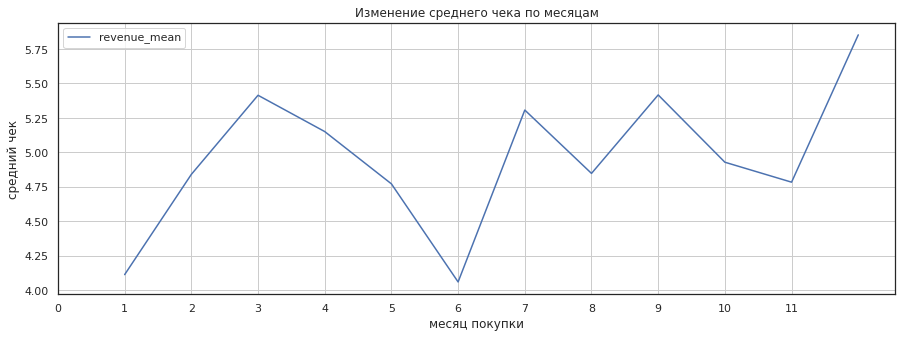

In [76]:
average_check.plot(x='order_month', y='revenue_mean', kind='line', figsize = (15,5), grid=True)
plt.title('Изменение среднего чека по месяцам')
plt.xlabel('месяц покупки')
plt.ylabel('средний чек')
plt.xticks(np.arange(0, 12, 1))
plt.show()

>**Выводы:**  
>1. Средний чек покупателя Яндекс. Афиши за весь период составляет: 5 у.е.  
>2. В июне наблюдается сильный провал. Средний чек составил всего: 4.05 у.е., также к спаду можно отнести и январь - 4.11 у.е. Что довольно обосновано -  в январе полсе новогодних праздников люди предпочитают экономить, а в июне ездят в отпуска.
>3. Пик продаж наблюдается в декабре (билеты - отличный подарок, а также период детских елок, новогодних мероприятий и тп), также высокие показатели в сентбяре и марте.

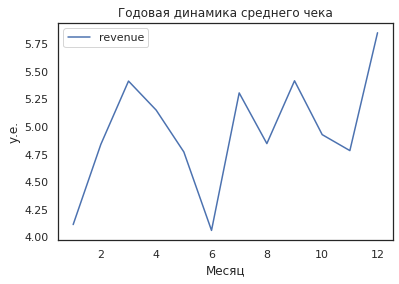

In [77]:
orders.pivot_table(index='order_month', values='revenue', aggfunc='mean').plot().set(title = 'Годовая динамика среднего чека', xlabel = 'Месяц', ylabel = 'у.е.')
plt.show()

#### Изменение LTV на покупателя по когортам. Рассчет среднего LTV по когортам за 6 месяцев (в расчёт включаются когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%)

In [78]:
#выделим месяц покупки, чтобы сформировать когорты по месяцам
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
#orders.head()

In [79]:
#получим месяц первой покупки каждого покупателя Яндекс.Афиши
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#first_orders.head()

In [80]:
#посчитаем количество новых покупателей за каждый месяц
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
#cohort_sizes.head()

In [81]:
#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами
orders_new = pd.merge(orders,first_orders, on='uid')
#orders_new.head()

In [82]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [83]:
#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [84]:
#Рассчитаем валовую прибыль и возраст каждой когорты
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


In [85]:
#Найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. 
report['ltv'] = report['gp'] / report['n_buyers']
report.head()
 

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


<AxesSubplot:title={'center':'LTV по когортам'}, xlabel='age', ylabel='first_order_month'>

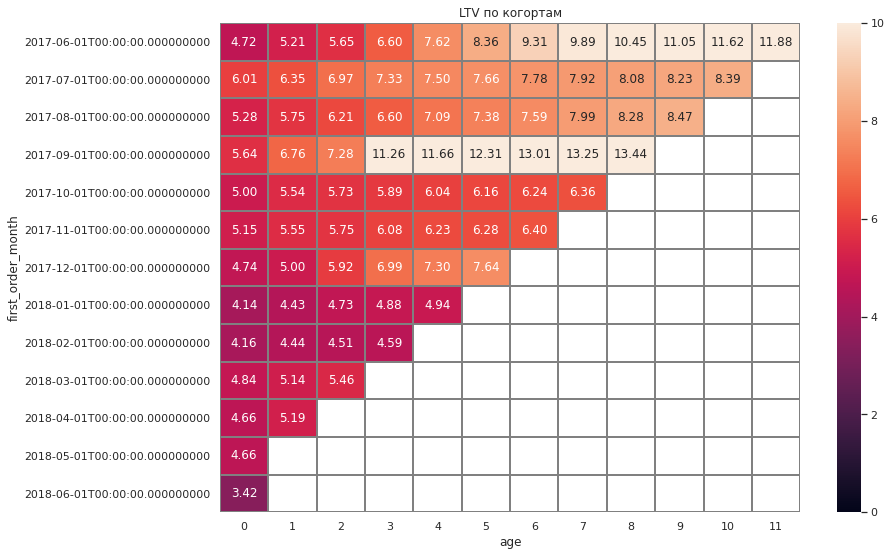

In [86]:
#Построим сводную таблицу
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)

output.fillna('')

#Тепловая карта LTV
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV по когортам')
sns.heatmap(output, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

In [87]:
#Для расчета среднего LTV возьмем только когорты до 2017-12-01 включительно, и age в 6 месяцев
report_6 = report.query('first_order_month <= "2017-12-01" and age <= 5')
#report_6.head()

In [88]:
print('Средний LTV всех клиентов за период в 6 месяцев составляет:', round(output[5].mean(),2), 'у.е.')

Средний LTV всех клиентов за период в 6 месяцев составляет: 7.97 у.е.


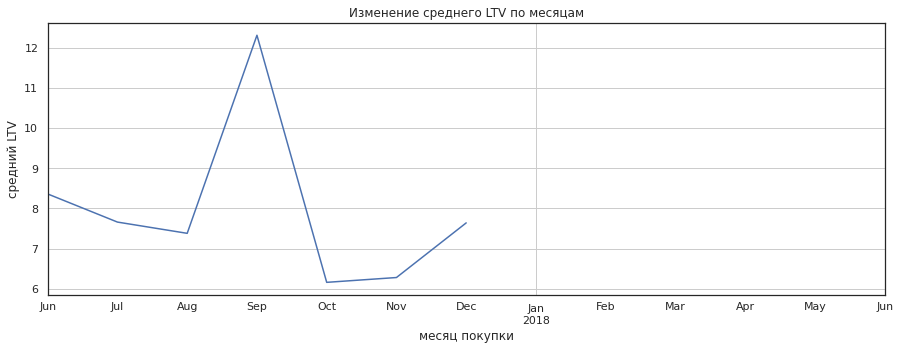

In [89]:
#Отразим изменения метрики во времени на графике
output[5].plot(x='cohort_month', y='ltv', kind='line', figsize = (15,5), grid=True)
plt.title('Изменение среднего LTV по месяцам')
plt.xlabel('месяц покупки')
plt.ylabel('средний LTV')
plt.show()

>**Выводы:**  
>1. Средний LTV по всем когортам состаялет 7.97 у.е. за 6 месяцев
>2. В сентябре LTV сильно идет вверх, покупатели сентябрьской когорты приносят больше денежных средств за 6 месяцев в среднем почти на 50% 
>3. Сильный наблюдается в октябрьской когорте, посетители октября самая неприбыльная группа. LTV меньше примерно на 22% среднего  
>4. Показатели ноябрьской когорты несильно идут вверх, декабрьские на равне с августовскими. Скорее всего декабрьская когорта, несмотря на высокий средний чек, действительно покупает только в декабре.  
>5. А вот июньская когорта, несмотря на низкий средний чек июня, в итоге приносит достаточное количество денежных средств с течением времени. Возможно, немногочиcленные июньские посетители сайта, заходят на сайт июне целенаправленно и далее остаются на долгое время, регулярно покупая

### Маркетинговые метрики

#### Расчет общей суммы расходов на маркетинг. Исследование распределения трат по источникам. 

In [90]:
#Считаем общие расходы на маркетинг
print('Общие расходы на маркетинг за весь период составили:', costs['costs'].sum(), 'у.е.')

Общие расходы на маркетинг за весь период составили: 329131.62 у.е.


In [91]:
#Распределяем траты по источникам
costs_source = costs.groupby('source_id').sum().reset_index()
display(costs_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


>На третий источник потратили в 2,3 раза больший бюджет, чем на самый дорогой из источников, а на 9 и 10 почти в 4 раза меньше, чем на самый дешевый из всех источников. Эти бюджеты сильно выбиваются из общей выборки, интересно посмотреть на окупаемость

In [92]:
#Выделяем месяц
costs['months'] = costs['dt'].astype('datetime64[M]')

In [93]:
#Составляем сводную таблицу 
costs_grouped = costs.pivot_table(index = ['months'], columns = 'source_id', values = costs, aggfunc = 'sum')
costs_grouped.head()

costs                                                     
source_id        1        2         3        4        5       9       10
months                                                                  
2017-06-01  1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07-01  1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08-01   951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09-01  1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10-01  2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24

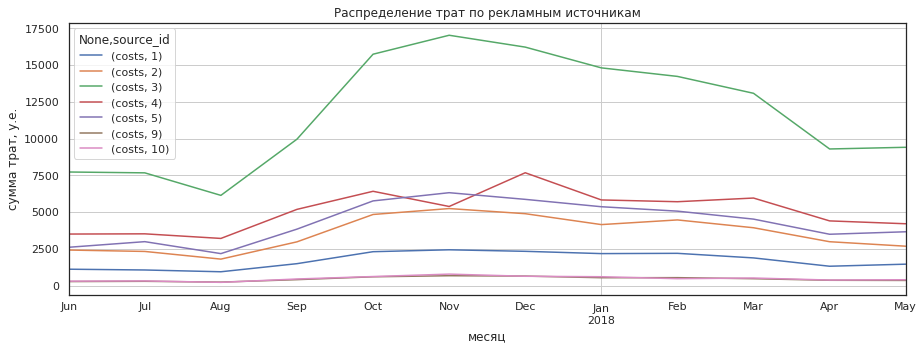

In [94]:
#Строим график месячного распределения трат по источникам 
costs_grouped.plot(figsize = (15,5), grid=True)
plt.title('Распределение трат по рекламным источникам')
plt.xlabel('месяц')
plt.ylabel('сумма трат, у.е.')
plt.show()

In [95]:
costs_total_month = costs.groupby('months').agg({'costs': 'sum'}).reset_index()
#costs_total_month.head()

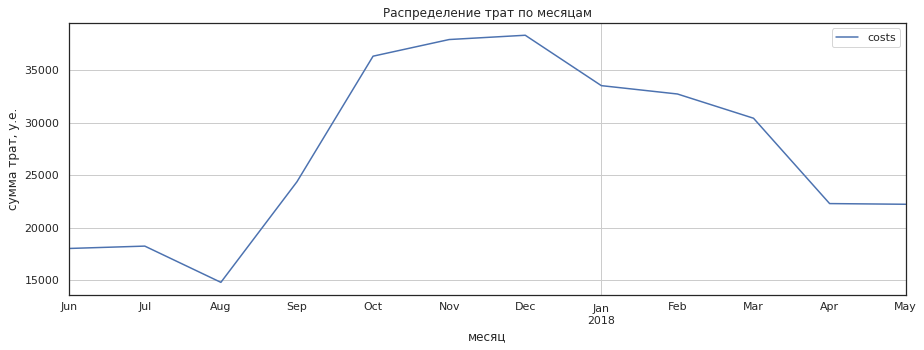

In [96]:
#Строим график месячного распределения трат
costs_total_month.plot(x='months', y='costs', kind='line', figsize = (15,5), grid=True)
plt.title('Распределение трат по месяцам')
plt.xlabel('месяц')
plt.ylabel('сумма трат, у.е.')
plt.show()

>**Выводы:**  
>1. Источник №3 сильно превышает траты на остальные источники, а на 9 и 10 источники был потрачен гораздо меньший бюджет, чем на остальные.  
>2. С августа по ноябрь траты на все источники возрастают, кроме источника №4. После ноября у всех этих источников наблюдается спад. У всех довольно плавный, у источника №3 (самого дорогого) спад более резкий.      
>3. Источник № 4 ведет себя не совсем как остальные. Траты на него возрастают в августе, как и у всех осальных. Однако, в то время, как у остальных траты с октября по ноябрь продолжают расти, у источника № 4 с октября по ноябрь траты резко упали, и далее резко возросли в декабре, когда у остальных источников эти месяцы плавно идут на спад. Кажется, что вложения в источник № 4 определялось сезонами. Будто бы это были дорогие "предновгодние" запросы (например, в контексте), отсюда и увеличение бюджета.  
>4. С августа по сентябрь начианется рос затрат на рекламные кампании, пик достигается в декабре и в январе значительный спад. С марта по апрель также резкий спад затрат на рекламные кампании

#### Расчет среднего CAC на одного покупателя для всего проекта и для каждого источника трафика. 

##### CAC на одного покупателя по всему проекту Яндекс.Афиша за весь период времени

In [97]:
costs_all = costs['costs'].sum()
n_buyers_all = orders['uid'].nunique() 
cac_total = costs_all / n_buyers_all
print('САС на одного покупателя по всему проекту Яндекс.Афиша за весь период составляет: {:.2f}'.format(cac_total), 'у.е')

САС на одного покупателя по всему проекту Яндекс.Афиша за весь период составляет: 9.01 у.е


In [98]:
cohorts_orders_grouped = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohorts_orders_grouped.columns = ['first_order_month', 'n_buyers']
#cohorts_orders_grouped.head()

In [99]:
costs_grouped123 = costs.groupby('months').agg({'costs': 'sum'}).reset_index()
#costs_grouped123.head()

In [100]:
cac_grouped = costs_grouped123.merge(cohorts_orders_grouped, left_index=True, right_index=True)
#cac_grouped.head()

In [101]:
cac_grouped['cac'] = cac_grouped['costs'] / cac_grouped['n_buyers']
cac_grouped.head()

,months,costs,first_order_month,n_buyers,cac
0,2017-06-01,18015.00,2017-06-01,2023,8.905091
1,2017-07-01,18240.59,2017-07-01,1923,9.485486
2,2017-08-01,14790.54,2017-08-01,1370,10.796015
3,2017-09-01,24368.91,2017-09-01,2581,9.441654
4,2017-10-01,36322.88,2017-10-01,4340,8.369327


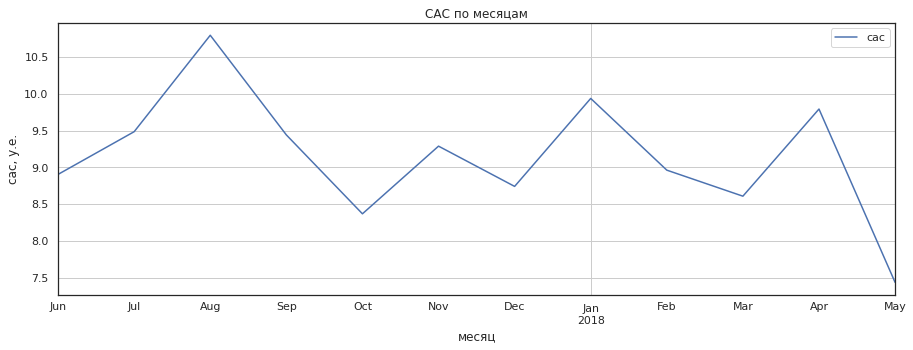

In [102]:
#Строим график 
cac_grouped.plot(x='months', y='cac', kind='line', figsize = (15,5), grid=True)
plt.title('САС по месяцам')
plt.xlabel('месяц')
plt.ylabel('сас, у.е.')
plt.show()

##### CAC на одного покупателя для каждого источника трафика

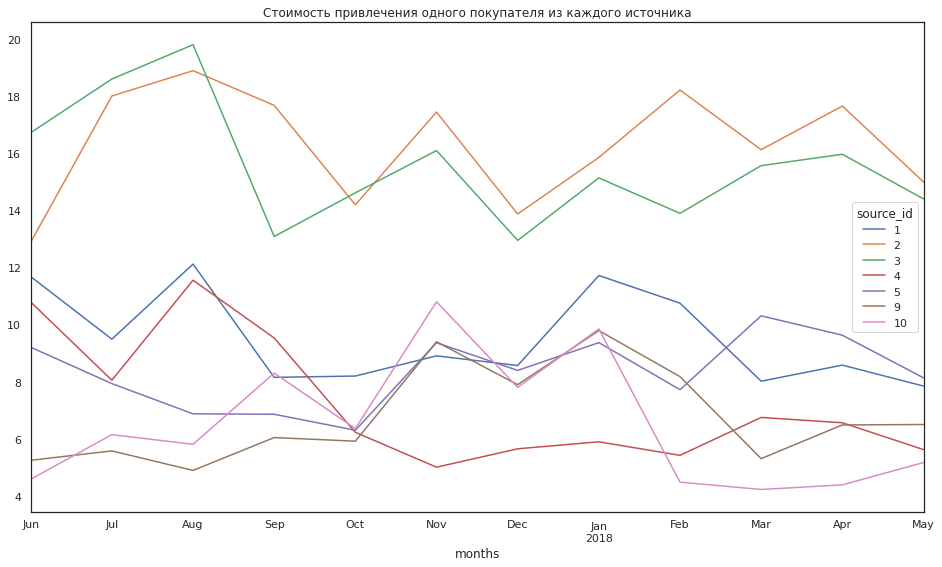

In [103]:
# Найдем время первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')


#отсортируем визиты по начальной дате и сгруппируем по первому uid.
users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]

#объединим с first_orders
first_orders_sources = pd.merge(first_orders,users, left_on='uid', right_index=True)

#cuheggbhetv
buyers_daily = first_orders_sources.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['costs_per_buyer'] = costs_['costs']/costs_['n_buyers']

costs_.pivot_table(index=['months'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(
    figsize=(16,9), title='Стоимость привлечения одного покупателя из каждого источника')
plt.show()

>**Выводы:**
>
>1. САС из второго и третьего источника выше, чем у остальных. Привлечение покупателя из этих источников обошлось примерно на 34% выше, чем, например, из четвертого источика. Траты на рекламу, у третьего источника тоже высокие, а вот на второй источник мы тратим по среднему. Возможно, этот источник дает нам покупателей, которые покупают дорогие билеты, тогда САС будет обоснованным.
>2. Самый низкий САС у источника 9 и 10. Однакко в ноябре САС из этих источников сильно идет вверх, тоже самое касается и января. 10й источник сильно падает уже к январю, а 9 к марту.
>3. Первый источник даетдовольно средние показатели, САС  у него увеличивается, как и у других в августе, ноябре, январе. Этот источник довольно стабилен.  
>4. Источник №4 показывает доовльно низкий САС, траты на рекламу средние. Есди это не супер дешевые билеты, возможно, 4 источник показывает довольно неплохие результаты  
>5. САС у 10 источника очень низкий с февраля по май. В эти периоды стоит обратить внимание именно на этот источник  
>6. В июне - 9 и 10 источник. В июле - обращаем внимание на источник 4 и 1, август - 9, 10 и 5, сентябрь - 1 и шанс увеличить рекламную кампанию на дорогой третий, чтобы продать дрогие билеты с ментшими затратами. Октябрь - 10 и 2, НОябрь - четвертый, декабрь - 10, 3 и 2. Январь - САС везде растет, видимо из-за сезонности, это в целом период затишья, на который тратиться особенно не стоит. С февраля по май можно воспользоваться ресурсами источника номер 10 по максимуму. В марте также можно рассмотреть 9, 1 и 2. В мае САС везде падает, тут скорее всего тоже играет роль сезоннность

#### Расчет ROMI по когортам в разрезе источников. Сравнение окупаемости за одинаковые периоды жизни когорт. 

In [104]:
#добавим месяц и revenue в покупателей с источниками
month_revenue = orders.groupby(['uid', 'order_month']).agg({'revenue': 'sum'}).reset_index()
buyers = first_orders_sources.merge(month_revenue,on = 'uid')

#сгруппируем по источнику и первому месяцу заказа, здесь нужны только уникальные uid
cohort_sizes_t = (
    buyers.groupby(['source_id', 'first_order_month'])
          .agg({'uid': 'nunique'})
          .reset_index())
cohort_sizes_t.columns = ['source_id', 'first_order_month', 'n_buyers']

#сгруппируем по источнику и первому месяцу заказа, проссумируем revenue
cohorts_revenue_t = (
    buyers.groupby(['source_id', 'first_order_month', 'order_month'])
          .agg({'revenue': 'sum'})
          .reset_index())
cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

# объединим таблицы, посчитаем age и ltv
report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])
report_romi['age'] = (report_romi['order_month'] - report_romi['first_order_month']) / np.timedelta64(1, 'M')
report_romi['age'] = report_romi['age'].round().astype('int')
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

#добавим таблицу costs, посчитаем сас и romi
report_romi = pd.merge(report_romi,costs.groupby(['source_id', 'months']).agg({'costs': 'sum'}).reset_index(),
               left_on=['source_id', 'first_order_month'], right_on=['source_id', 'months'])
report_romi = report_romi.drop(['months'], axis = 1) 
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
display(report_romi.head())



,source_id,first_order_month,n_buyers,order_month,gp,age,ltv,costs,cac,romi
0,1,2017-06-01,190,2017-06-01,1378.70,0,7.256316,1125.61,5.924263,1.224847
1,1,2017-06-01,190,2017-07-01,414.98,1,2.184105,1125.61,5.924263,0.368671
2,1,2017-06-01,190,2017-08-01,419.43,2,2.207526,1125.61,5.924263,0.372625
3,1,2017-06-01,190,2017-09-01,714.24,3,3.759158,1125.61,5.924263,0.634536
4,1,2017-06-01,190,2017-10-01,811.20,4,4.269474,1125.61,5.924263,0.720676


##### ROMI в разрезе источника №1

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.22,0.37,0.37,0.63,0.72,0.35,0.44,0.43,0.38,0.28,0.20,0.28
2017-07-01,2.31,0.53,1.17,0.86,0.85,0.48,0.50,0.52,0.51,0.43,0.34,NaN
2017-08-01,3.20,0.67,1.29,0.97,0.98,0.56,0.58,0.84,0.77,0.52,NaN,NaN
2017-09-01,4.11,0.95,1.38,1.11,0.98,0.57,0.60,0.88,0.86,NaN,NaN,NaN
2017-10-01,4.99,1.10,1.41,1.17,0.99,0.59,0.62,0.93,NaN,NaN,NaN,NaN
2017-11-01,5.97,1.18,1.54,1.29,1.01,0.60,0.63,NaN,NaN,NaN,NaN,NaN
2017-12-01,6.62,1.22,1.58,1.32,1.02,0.62,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,7.25,1.23,1.60,1.43,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,7.83,1.36,1.60,1.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №1'}, xlabel='age', ylabel='first_order_month'>

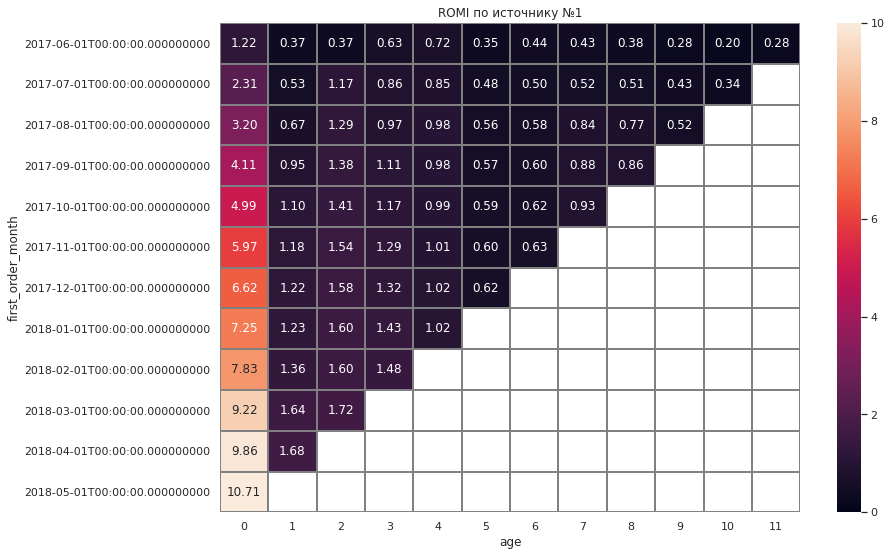

In [105]:
report_per_source_1 = report_romi.query('source_id == 1')

pivot_romi_source_1 = report_per_source_1.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_1)
#Тепловая карта по когортам в разрезе источника №1
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №1')
sns.heatmap(pivot_romi_source_1, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

>**Выводы:**
>
>1. По первому источнику высокая окупаемость только в первом месяце жизни каждой когорты. Начиная со второго месяца жизни когорты окупаемость сильно падает. Разница в 3 и более раз
>2. В когортах с июня по август (лето) показатели резко падают уже на второй месяц, потом растут вдвое, потом падают на 30%, держатся 2 месяца и падают вдвое.
>3. С каждой когортой растет разница между окупаемостью в первый месяц относительно второго. Так, если в июньской когорте окупаемость на второй месяц упала в 3 раза, то в аперльской когорте эта разница уже практически 6 раз.  
>4. С каждой когортой окупаемость растет

##### ROMI в разрезе источника №2

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.43,0.05,0.03,0.19,0.16,0.09,0.16,0.14,0.13,0.07,0.13,0.04
2017-07-01,1.18,0.12,0.03,0.22,0.20,0.11,0.18,0.16,0.14,0.09,0.16,NaN
2017-08-01,1.57,0.18,0.04,0.23,0.23,0.11,0.19,0.18,0.14,0.10,NaN,NaN
2017-09-01,2.18,0.78,0.22,0.30,0.34,0.18,0.44,0.24,0.18,NaN,NaN,NaN
2017-10-01,2.81,0.98,0.27,0.34,0.38,0.20,0.44,0.26,NaN,NaN,NaN,NaN
2017-11-01,3.34,1.05,0.31,0.40,0.41,0.21,0.45,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.03,1.17,1.03,1.27,0.65,0.46,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.33,1.25,1.15,1.28,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.69,1.29,1.17,1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №2'}, xlabel='age', ylabel='first_order_month'>

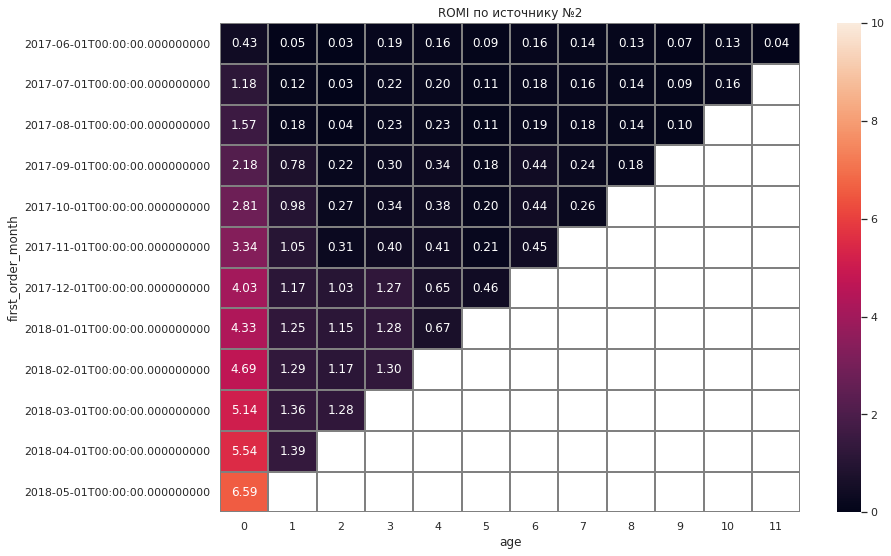

In [106]:
report_per_source_2 = report_romi.query('source_id == 2')

pivot_romi_source_2 = report_per_source_2.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_2)
#Тепловая карта по когортам в разрезе источника №2
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №2')
sns.heatmap(pivot_romi_source_2, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

>**Выводы:**
>
>1. По второму источнику высокая окупаемость также в первом месяце жизни каждой когорты. Начиная со второго месяца жизни когорты окупаемость падает  
>2. Однако, в отличии от первого источника, разница в окупаемости между первым и вторым месяцем жизни когорты не увеличивается, а наоборот снижается. Т.е. апрельская когорта во втором месяце не будет настолько провальной относитеьно первого, как июньская когорта  
>3. В июньской когорте  к концу жизни окупаемость упала в 10 раз. Вероятнее всего это может ждать и другие когорты

##### ROMI в разрезе источника №3

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.36,0.01,0.02,0.03,0.02,0.02,0.01,0.00,0.00,0.00,0.00,0.0
2017-07-01,0.77,0.03,0.02,0.05,0.02,0.02,0.01,0.01,0.01,0.01,0.01,NaN
2017-08-01,1.05,0.04,0.04,0.06,0.03,0.02,0.02,0.02,0.01,0.01,NaN,NaN
2017-09-01,1.48,0.05,0.06,0.06,0.04,0.03,0.03,0.02,0.02,NaN,NaN,NaN
2017-10-01,1.84,0.09,0.07,0.07,0.05,0.04,0.03,0.03,NaN,NaN,NaN,NaN
2017-11-01,2.16,0.10,0.08,0.08,0.06,0.04,0.03,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.50,0.11,0.09,0.09,0.06,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2.78,0.12,0.10,0.09,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.07,0.14,0.11,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №3'}, xlabel='age', ylabel='first_order_month'>

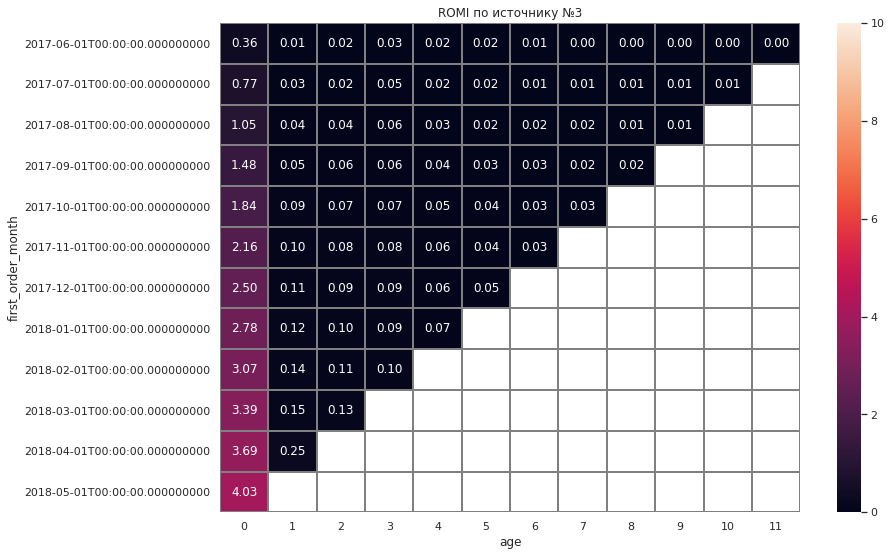

In [107]:
report_per_source_3 = report_romi.query('source_id == 3')

pivot_romi_source_3 = report_per_source_3.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_3)
#Тепловая карта по когортам в разрезе источника №3
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №3')
sns.heatmap(pivot_romi_source_3, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

>**Выводы:**
>
>Источник 3 ведет себя также в первый месяц, как и остальные. Однако в первой когорте разница между первым месяцем и второым месяцем жизни составляет 36 раз. В аперельской когорте эта разница снижается до 14 раз, но все равно является критично большой. Возможно источник №3 хорошо показывает себя только в первый месяц жизни когорты. Например, на 8й месяц жизни июньской когорты, она выходит в 0. Стоит задуматься об этом источнике

##### ROMI в разрезе источника №4

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.56,0.00,0.02,0.05,0.13,0.17,0.17,0.03,0.03,0.09,0.15,0.01
2017-07-01,1.37,0.01,0.03,0.08,0.14,0.18,0.18,0.03,0.04,0.10,0.15,NaN
2017-08-01,1.90,0.03,0.05,0.11,0.16,0.21,0.19,0.05,0.05,0.12,NaN,NaN
2017-09-01,2.44,0.09,0.08,0.14,0.16,0.23,0.33,0.08,0.05,NaN,NaN,NaN
2017-10-01,3.24,0.11,0.11,0.16,0.19,0.25,0.35,0.10,NaN,NaN,NaN,NaN
2017-11-01,4.36,0.25,0.13,0.25,0.23,0.26,0.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,5.11,0.27,0.15,0.26,0.24,0.27,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,5.78,0.29,0.16,0.28,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,6.57,0.31,0.17,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №4'}, xlabel='age', ylabel='first_order_month'>

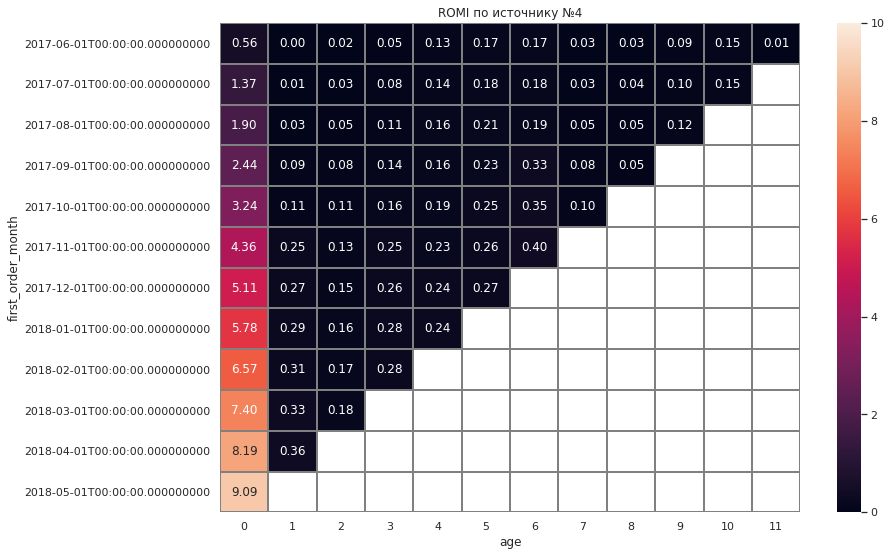

In [108]:
report_per_source_4 = report_romi.query('source_id == 4')

pivot_romi_source_4 = report_per_source_4.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_4)
#Тепловая карта по когортам в разрезе источника №4
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №4')
sns.heatmap(pivot_romi_source_4, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

>**Выводы**   
>
>Источник №4, как и источник №3 показыват совершенно немыслимую разницу между первым и вторым месяцем жизни когорт. Разница практически в 30 раз, июньская когорта на второй месяц вышла в 0, к 11 месяцу выползла в хоть какую-то окупаемость, но на 12 месяце жизни снова провалилась. Этот источник тоже показывает двольно плохие результаты 

##### ROMI в разрезе источника №5

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.73,0.13,0.07,0.13,0.10,0.04,0.13,0.09,0.08,0.14,0.02,0.02
2017-07-01,1.47,0.18,0.13,0.15,0.11,0.06,0.14,0.10,0.09,0.15,0.03,NaN
2017-08-01,2.30,0.30,0.27,0.27,0.29,0.16,0.20,0.14,0.13,0.19,NaN,NaN
2017-09-01,3.25,0.33,0.32,2.74,0.41,0.47,0.24,0.17,0.14,NaN,NaN,NaN
2017-10-01,4.09,0.37,0.34,2.76,0.43,0.48,0.27,0.19,NaN,NaN,NaN,NaN
2017-11-01,4.59,0.39,0.35,2.77,0.44,0.49,0.28,NaN,NaN,NaN,NaN,NaN
2017-12-01,5.24,0.40,0.36,2.77,0.44,0.49,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,5.76,0.47,0.41,2.78,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,6.33,0.48,0.41,2.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №5'}, xlabel='age', ylabel='first_order_month'>

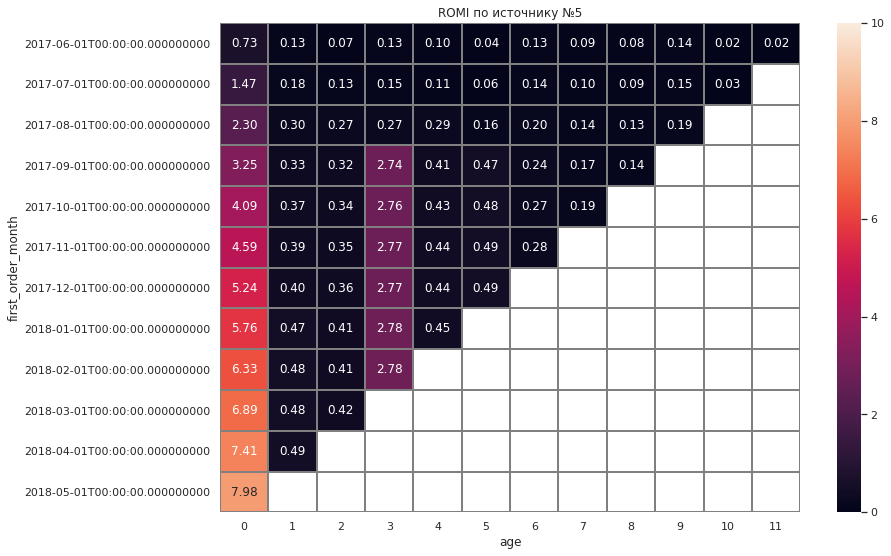

In [109]:
report_per_source_5 = report_romi.query('source_id == 5')

pivot_romi_source_5 = report_per_source_5.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_5)
#Тепловая карта по когортам в разрезе источника №5
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №5')
sns.heatmap(pivot_romi_source_5, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

>**Выводы**  
>
>Здесь также с каждой когортой увеличивается разница между первым и вторым месяцем жизни. Однако с каждой когортой ROMI только увеличивает показатели. На 4й месяц жизни в когортах с сентября по январь показатели возрастают почти в 8 раз. Далее такой динамик  не наблюдается. Возможно стоит ограничить рекламные кампании по этому источнику дл 4х месяцев. 

##### ROMI в разрезе источника №9

age,0,1,2,3,4,5,6,7,8,9,10
first_order_month,,,,,,,,,,,
2017-06-01,0.85,0.02,0.14,0.14,0.06,0.11,0.13,0.03,0.13,0.03,0.02
2017-07-01,1.62,0.04,0.25,0.23,0.13,0.12,0.18,0.04,0.20,0.03,0.03
2017-08-01,2.62,0.09,0.41,0.28,0.14,0.13,0.21,0.11,0.22,0.07,NaN
2017-09-01,3.52,0.31,0.54,0.45,0.27,0.16,0.34,0.25,0.41,NaN,NaN
2017-10-01,4.56,0.42,0.63,0.48,0.33,0.27,0.34,0.25,NaN,NaN,NaN
2017-11-01,5.36,0.45,0.66,0.54,0.36,0.28,0.35,NaN,NaN,NaN,NaN
2017-12-01,6.06,0.50,0.69,0.59,0.36,0.31,NaN,NaN,NaN,NaN,NaN
2018-01-01,6.48,0.54,0.72,0.59,0.36,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,7.21,0.56,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №9'}, xlabel='age', ylabel='first_order_month'>

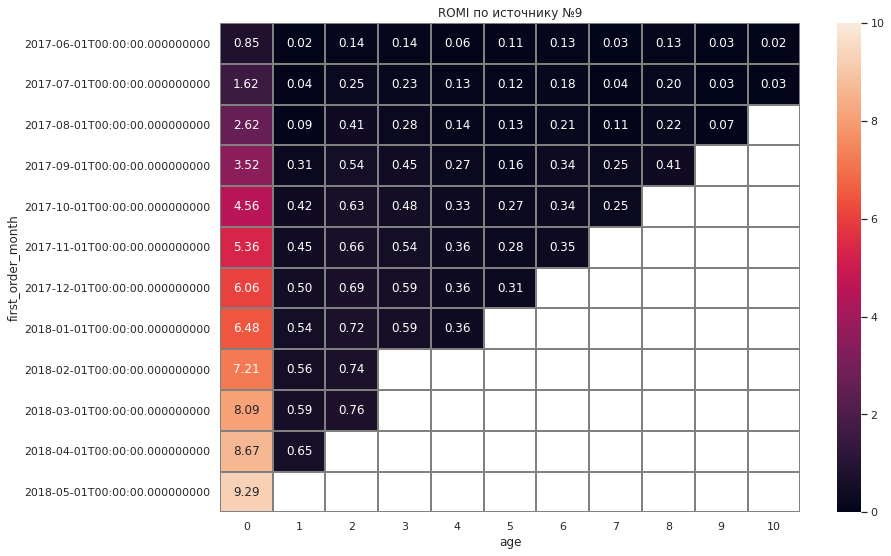

In [110]:
report_per_source_9 = report_romi.query('source_id == 9')

pivot_romi_source_9 = report_per_source_9.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_9)
#Тепловая карта по когортам в разрезе источника №9
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №9')
sns.heatmap(pivot_romi_source_9, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

>**Выводы**  
>
>Окупаемость источника 9 растет с каждой когортой, однако в когортах с июня по август (3 месяца) окупаемость на второй месяц жизни падает в разы и только с сентября начинает выравниваться. Возможно стоит вообще ограничиться включением этого источника только с сентября, пропустив летние месяцы.

##### ROMI в разрезе источника № 10

age,0,1,2,3,4,5,6,7,8,9
first_order_month,,,,,,,,,,
2017-06-01,0.73,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
2017-07-01,1.27,0.04,NaN,0.02,NaN,NaN,NaN,NaN,0.00,NaN
2017-08-01,2.06,0.06,0.05,NaN,NaN,NaN,NaN,0.02,NaN,0.01
2017-09-01,2.48,0.07,0.07,0.06,0.01,NaN,NaN,0.02,0.01,NaN
2017-10-01,3.35,0.10,0.07,0.06,0.02,0.00,0.01,0.04,NaN,NaN
2017-11-01,4.10,0.11,0.07,0.09,0.03,0.01,0.02,NaN,NaN,NaN
2017-12-01,4.60,0.12,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN
2018-01-01,5.06,0.13,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,5.69,0.16,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROMI по источнику №10'}, xlabel='age', ylabel='first_order_month'>

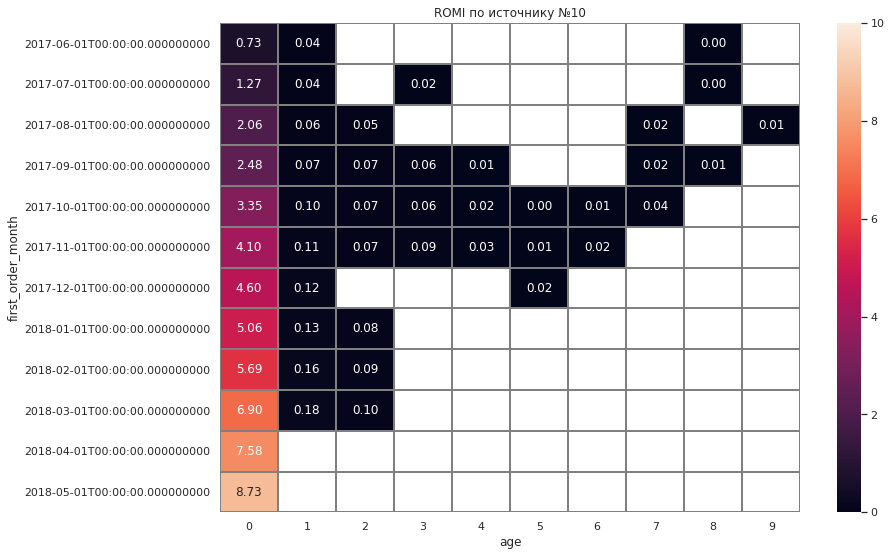

In [111]:
report_per_source_10 = report_romi.query('source_id == 10')

pivot_romi_source_10 = report_per_source_10.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').cumsum().round(2)
display(pivot_romi_source_10)
#Тепловая карта по когортам в разрезе источника №10
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источнику №10')
sns.heatmap(pivot_romi_source_10, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',
            vmin=0, vmax=10)

> **Выводы**  
>
>От источника 10 я бы избавилась вообще. Кажется, если перераспределить бюджет в более выгодные источники, это даст больший результат

##  Выводы и рекомендации

### Источники трафика, на которые маркетологам стоит делать упор. 

1. От истчоника 10 можно отказаться.  
2. Источник 9 можно рассматривать, но включать кампании с сентября. Возможно, тут можно усилить кампании, поскольку стоимость привлечения клиента все равно низкаяя и посмотреть увеличит ли это продажи  
3. Кампании по источнику №3 с сильно высокими тратами и высокой стоимостью клиента стоит пересмотреть, так как в итоге окупаемость этого источника явно не сильно большая. На источник тратиться много сил, по факту тех же клиентов, возможно, можно получить ментшими трудозатрами. Однако, также это могту быть и спец клиенты и предложения.  
4. Первый и второй источники наиболее приоритетны.  

### Выводы после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции

#### Маркетинговые метрики

1. Наиболее окупаемыми являются источники 1 и 2. .
2. Все источники в большей или меньшей степени увеличивают свою окупаемость с каждой когортой, ожнако на второй месяц жизни когорты наблюдается уже резкий провал в окупаемости. Кажется, что посточнно нужны все новые клиенты   
3. САС из второго и третьего источника выше, чем у остальных. Привлечение покупателя из этих источников обошлось примерно на 34% выше, чем, например, из четвертого источика. Траты на рекламу, у третьего источника тоже высокие, а вот на второй источник мы тратим по среднему. Возможно, этот источник дает нам покупателей, которые покупают дорогие билеты, тогда САС будет обоснованным.
4. Самый низкий САС у источника 9 и 10. Траты там, как мы помним тоже низкие
5. Самый низкий САС у источника 9 и 10. Однакко в ноябре САС из этих источников сильно идет вверх, тоже самое касается и января. 10й источник сильно падает уже к январю, а 9 к марту.
6. Первый источник даетдовольно средние показатели, САС  у него увеличивается, как и у других в августе, ноябре, январе. Этот источник довольно стабилен.  
7. Источник №4 показывает доовльно низкий САС, траты на рекламу средние. Есди это не супер дешевые билеты, возможно, 4 источник показывает довольно неплохие результаты  
8. САС у 10 источника очень низкий с февраля по май. В эти периоды стоит обратить внимание именно на этот источник  
9. В июне - 9 и 10 источник. В июле - обращаем внимание на источник 4 и 1, август - 9, 10 и 5, сентябрь - 1 и шанс увеличить рекламную кампанию на дорогой третий, чтобы продать дрогие билеты с ментшими затратами. Октябрь - 10 и 2, НОябрь - четвертый, декабрь - 10, 3 и 2. Январь - САС везде растет, видимо из-за сезонности, это в целом период затишья, на который тратиться особенно не стоит. С февраля по май можно воспользоваться ресурсами источника номер 10 по максимуму. В марте также можно рассмотреть 9, 1 и 2. В мае САС везде падает, тут скорее всего тоже играет роль сезоннность
10. Источник №3 сильно превышает траты на остальные источники, а на 9 и 10 источники был потрачен гораздо меньший бюджет, чем на остальные.  
11. С августа по ноябрь траты на все источники возрастают, кроме источника №4. После ноября у всех этих источников наблюдается спад. У всех довольно плавный, у источника №3 (самого дорогого) спад более резкий.  
12. С августа по сентябрь начианется рос затрат на рекламные кампании, пик достигается в декабре и в январе значительный спад. С марта по апрель также резкий спад затрат на рекламные кампании
13. Источник № 4 ведет себя не совсем как остальные. Траты на него возрастают в августе, как и у всех осальных. Однако, в то время, как у остальных траты с октября по ноябрь продолжают расти, у источника № 4 с октября по ноябрь траты резко упали, и далее резко возросли в декабре, когда у остальных источников эти месяцы плавно идут на спад. Кажется, что вложения в источник № 4 определялось сезонами. Будто бы это были дорогие "предновгодние" запросы (например, в контексте), отсюда и увеличение бюджета.

#### Продуктовые метрики

1. Среднее количество уникальных пользователей Яндекс.Афиши в день: 907 человек. Резкий пик был всего однажды, в конце ноября 2017 года(3319 пользователей зашли на сайт), а резкий спад в самом конце марта 2018 года (всего 1 уникальный пользователь). В остальном дневное количество посетителей можно считать достаточно ровным. После резкого спада в 2018 году, количество посетителей так и не достигло средней посещаемости в период до этого спада. Рост до прошлых показателей начался только в самом конце мая 2018. С середины августа 2017 до октября 2017 дневное количество посетителей растет, а начиная с октября 2017 до резкого спада в конце марта 2018 года, идет достаточно ровными показателями.
2. Среднее количество уникальных пользователей Яндекс. Афиши в неделю: 5716 человек. Пик в 10586 человек был примерно на 47 неделе 2017 года (как раз, конец ноября 2017 года) Этот пик скорее всего появился из-за резкого скачка посетителей в один день. А недельный провал в уникальных посетителях пришлеся на начало периода, 22 неделю 2017 года, а также примерно на 30 неделю 2017 года. Более таких сильных недельных спадов не наблюдалось.
3. Среднее количество уникальных пользователей Яндекс. Афиши в месяц: 23228 человек. Пик в ноябре 2017, а сильный спад в августе 2017. Спад также начался в марте 2018 года, в апреле показатели выровнялись но не выросли. С августа 2017 по ноябрь 2017 наблюдался стабильный рост,но вреоятнее всего после аномального скачка, показатели чуть упали до прошлых отметок и продолжили падать вплоть до конца периода.
4. В среднем пользователи заходили на сайт Яндекс.Афиши в выбранный период 1 раз в день.
5. Типичная пользовательская сессия составляет 1 минуту. Вероятнее всего человек сразу покупает билеты, которые находятся  у него в корзине и вероятнее всего через приложение, когда платежные реквизиты уже заведены или через apple / google pay. Получается, что у большинства пользователей должна быть хотя бы одна сессия, которая длится нормальное количество времени, если он подбирает мероприятия через Яндекс Афишу или хотя бы размышляет над местами, а не только покупает билеты, которые уже в корзине. 
6. С каждым месяцем в среднем Retention Rate в каждой когорте падает.
7. Самый высокий Retention rate за 1 месяц у пользователей, пришедших на сайт в сентябре, а вот самый низкий у мартовских пользователей. Связано ли это с сезонностью и возрастанием спроса на развлечения к осени? Осенью RR стабильно показывает довольно высокие показатели по отношению к остальным. Также высокий показатель в июне, а вот в июле наблюдается резкий спад. Возможно, в этот месяц много отпусков и пользователи, зашедшие на сайт в июле, были менее заинтересованы в предложении.
8. Для пользователей, пришедших в июне RR составляет 7,8 процентов в первый месяц, а у тех, кто пришел уже в апреле всего 4,2%. RR за 9 месяцев упал на 3,6%. Однако в апреле ему удалось вырасти на 0.6 пунктов. Если сервис не ухудшался, возможно, скачки связаны с сезонностью, поэтому стоит обратить внимание на месяцы, где RR проседает и сделать упор на кампании мероприятий, которые больше всего заинтересуют пользователей в это время

#### Метрики электронной коммерции

1. С момента первого посещения Яндекс.Афиши до момента соврешения первой покупки проходит в среднем 4.15 часов. Вероятнее всего человеку требуется время, чтобы поискать интересные мероприятия, выбрать, возможно обсудить с родными / друзьями (ведь мероприятия чаще посещают с кем-то) и только потом зайти повторно и совершить покупку
2. В среднем за период в 6 месяцев покупатели делают одну покупку
3. Средний чек покупателя Яндекс. Афиши за весь период составляет: 5 у.е.
4. В июне и январе наблюдается сильный провал в среднем чеке. Вероятнее всего в январе после новогодних праздников люди предпочитают экономить, а в июне ездят в отпуска.
5. Пик продаж наблюдается в декабре (билеты - отличный подарок, а также период детских елок, новогодних мероприятий и тп), также высокие показатели в сентбяре и марте.  
6. Средний LTV составляет 7,97 у.е.
7. В сентябре LTV сильно идет вверх, покупатели сентябрьской когорты приносят больше денежных средств за 6 месяцев в среднем на 35%
8. Спад в LTV наблюдается в октябрьской когорте, посетители октября самая неприбыльная группа. LTV меньше примерно на 22% среднего
9. Показатели ноябрьской когорты несильно идут вверх, декабрьские идут на равне с августовскими. Скорее всего декабрьская когорта, несмотря на высокий средний чек, действительно покупает только в декабре.
10. Июньская когорта, несмотря на низкий средний чек июня, в итоге приносит достаточное количество денежных средств с течением времени. Возможно, немногочсиленные июньские посетители сайта, заходят на сайт июне целенаправленно и далее остаются на долгое время, регулярно покупая

### Итоги когортного анализа. Самые перспективные для компании когорты клиентов

1. Самый высокий Retention rate за 1 месяц у пользователей, пришедших на сайт в сентябре и в июне. Стоит обратить внимание на эти когорты, ведь эти посетители наиболее часто возвращаются, принося стабильные продажи  
2. Самые высокая окупаемость в первый месяц жизни у майской когорты.
